# Loan Prediction Project

Like any data science project, it's important to follow certain steps.



### 1- Understanding the problem and defining the goal of the analysis

### Context 
Financial institutions, like banks and credit unions, face the challenge of accurately assessing the creditworthiness of loan applicants. This decision-making process involves balancing the risk of loan default with the potential for profit and serving the needs of their customers. Traditional methods often rely on manual review and credit scoring models, which can be time-consuming, prone to bias, and limited in their ability to capture complex relationships within the data.

### Objectives

Develop a robust and reliable machine learning model to predict whether or not to authorize loan to a customer. This model will be used to:
- Improve loan approval efficiency: By automating the initial screening process, the model can help streamline loan applications and reduce the workload on loan officers.
- Reduce risk of loan default: By accurately identifying high-risk applicants, the model can help financial institutions make informed lending decisions and minimize potential losses.
- Promote financial inclusion: By considering a wider range of factors beyond traditional credit scores, the model can potentially enable institutions to extend credit opportunities to a broader and more diverse pool of applicants.


 

### 2- Collecting and acquiring data from various sources

-	Data source: The dataset come from Kaggle. Loan Prediction Problem Dataset (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download)
-	Data format: The dataset is a CSV file and has 614 rows and 13 columns.
-	Data type: No idea. (It’s important to know if the data along the first-party data, the second-party data, or the third-party data. That could be helpful when dealing with missing values) 



### 3- Exploring, cleaning and analysis of the data


#####  Install and import packages

In [86]:
!pip install scikit-learn




Defaulting to user installation because normal site-packages is not writeable


In [514]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing
from sklearn.preprocessing import LabelEncoder
import pickle


# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)


# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# This module lets us save our models once we fit them.
import pickle


#####   Load the dataset

In [515]:
# Import the Dataset
df =  pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

#####   Display the dataset

In [516]:
# display the dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#####  Display the 10 first raws of the data

In [517]:
# Display the 10 first raws of the data

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#####  Display the information about data size

In [518]:
# Get the data size

df.shape

(614, 13)

The dataset has 614 raws and 13 columns. 

#####    Display the informations about data (Differents columns, Missing Values, Datatypes)



In [519]:
# Get the basics informations about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#####  Display the summary statistics (Numerical values)

In [520]:
# Get the summary statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#####   Display the summary statistics (Categorical values)

In [521]:
# Get the summary statistics
df.describe(include ='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


##### Loan_ID column is not important

In [522]:
# Delete Loan_ID column
df.drop(['Loan_ID'], axis = 1, inplace = True)




#####  Check and handle the missing values

In [523]:
# Check the missing values

df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

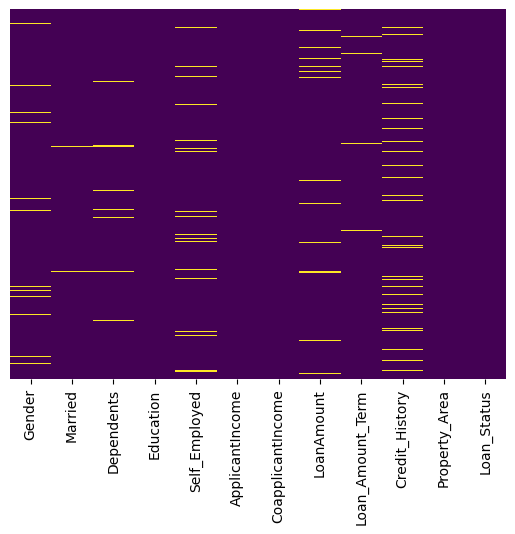

In [524]:
# Using a chart to display the missing values

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

For handle the missing values, we are going to split the data into numerical values and categorical values and :
- For the categorical values, each missing value will be replaced by the most frequent value (mode).
- We are going to use backward filling method for the numerical values

In [525]:
 # Plitting the data into numerical and categorical values

cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
# Because Cat_data and num_data are the lists, this code will transform it into database
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [526]:
# Display the categorical values (cat_data). 
cat_data


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [527]:
# Display the numerical values (num_data).
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [528]:
# Filling the missing values into the categorical data (cat_data)
cat_data = cat_data.apply(lambda x:x.fillna (x.value_counts().index[0]))
# Ckeck the missing values into Cat_data
cat_data.isnull().sum().any()

False

In [529]:
# Using backward filling to fill missing values into num_data
num_data.fillna(method = 'bfill', inplace = True)
# Ckeck the missing values into num_data
num_data.isnull().sum().any()

C:\Users\12409\AppData\Local\Temp\ipykernel_13752\3097393302.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method = 'bfill', inplace = True)


False

Awesome, everything looks great! No more missing values

#####  Check For and handle duplicates values

In [530]:
# Check for duplicates
df.duplicated().sum()

0

There are not duplicates value

##### Check Class Balance

In [531]:
# Check class balance

df['Loan_Status'].value_counts(normalize = True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

Approximately 69 % of the dataset represents videos posted by unverified accounts and 31 % represents videos posted by verified accounts. So the outcome variable is not too imbalanced.

##### Encode the variables

In [532]:
# Encode the dependent variable
cat_data['Loan_Status'] = cat_data['Loan_Status'].map({'Y': 1,'N': 0})


In [533]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,1
1,Male,Yes,1,Graduate,No,Rural,0
2,Male,Yes,0,Graduate,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,Urban,1
4,Male,No,0,Graduate,No,Urban,1
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1
610,Male,Yes,3+,Graduate,No,Rural,1
611,Male,Yes,1,Graduate,No,Urban,1
612,Male,Yes,2,Graduate,No,Urban,1


In [534]:
# Encode the independent categorical variable
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

# Display the cat_data
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [535]:
# Get the dtypes of cat_data
cat_data.dtypes

Gender           int32
Married          int32
Dependents       int32
Education        int32
Self_Employed    int32
Property_Area    int32
Loan_Status      int64
dtype: object

##### Check the Loan_Status distribution for categorical values(plit by Loan_Status)



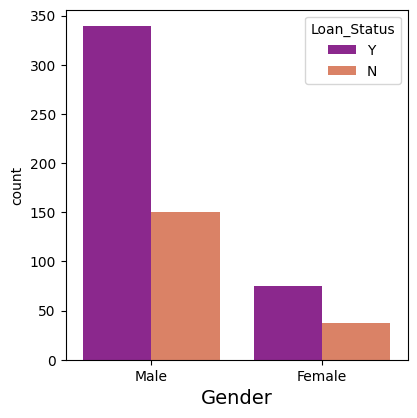

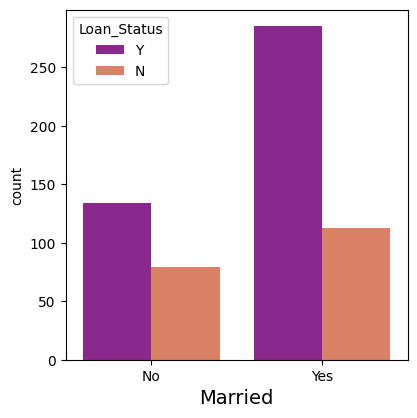

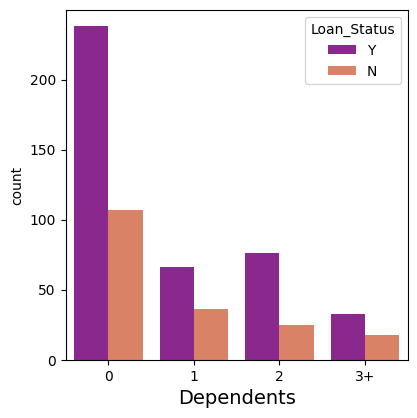

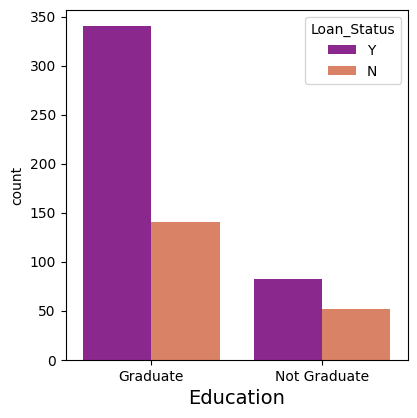

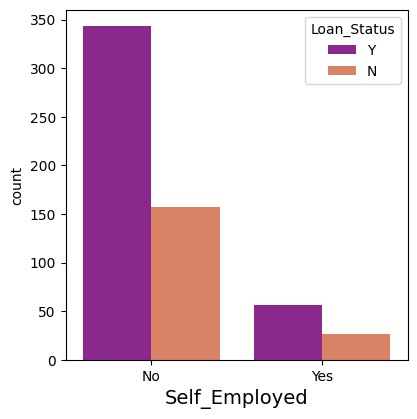

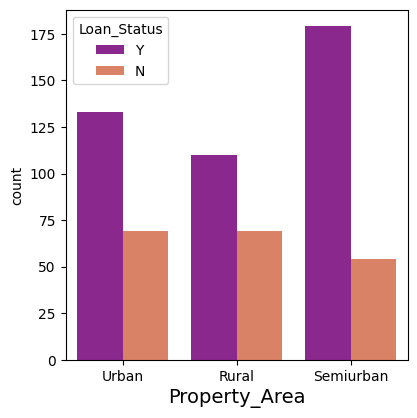

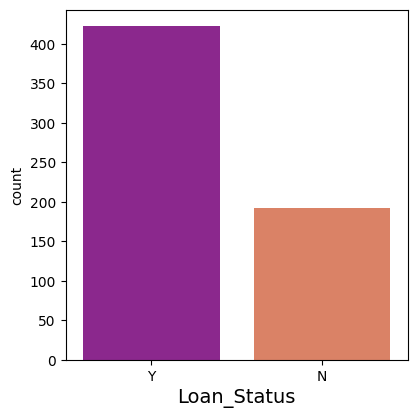

In [536]:
# Loan_Status distribution for categorical values

for i in cat_data[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data= df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

##### Check relation between the Loan_Status and numerical columns

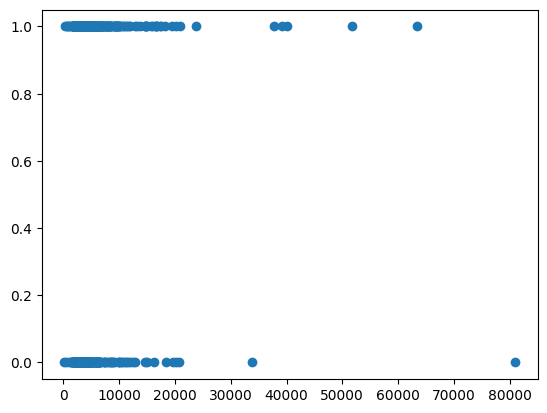

In [537]:
# ApplicantIncome and Loan_Status
plt.scatter(num_data['ApplicantIncome'], cat_data['Loan_Status'])

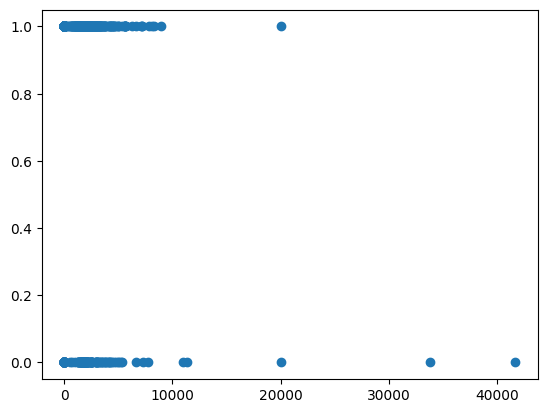

In [538]:
# CoapplicantIncome and Loan_Status
plt.scatter(num_data['CoapplicantIncome'], cat_data['Loan_Status'])

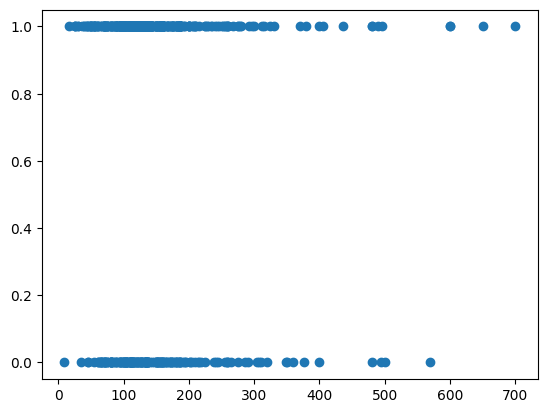

In [539]:
# LoanAmount and Loan_Status
plt.scatter(num_data['LoanAmount'], cat_data['Loan_Status'])

##### Concat cat_data and num_data

In [540]:
# Concat cat_data and num_data

data = pd.concat([num_data, cat_data], axis = 1)

In [541]:
# Display the data
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,1,1,3,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,2,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,2,0,0,2,1


##### Recheck the missing values

In [542]:
# Check missing values
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

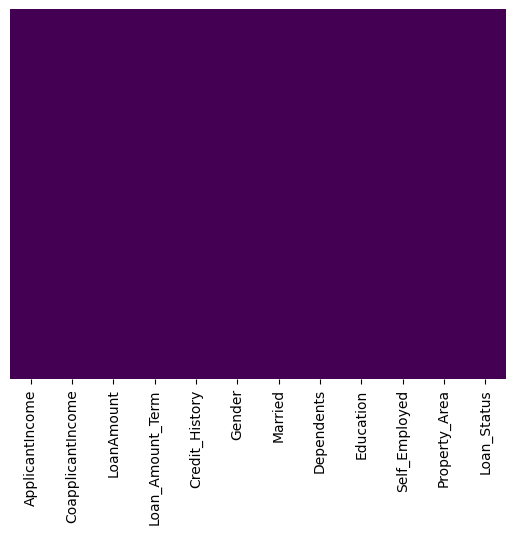

In [543]:
# Using a chart to check missing value
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Awesome!

##### Check the correlation

In [544]:
# Code a correlation matrix to help determine most correlated variables
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.555732,-0.046531,-0.006915,0.058809,0.051708,0.118202,-0.140760,0.127180,-0.009500,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190020,-0.059383,0.021598,0.082912,0.075948,0.030430,-0.062290,-0.016100,0.010522,-0.059187
LoanAmount,0.555732,0.190020,1.000000,0.038747,0.015444,0.116791,0.140653,0.156092,-0.169242,0.114256,-0.045023,-0.039871
Loan_Amount_Term,-0.046531,-0.059383,0.038747,1.000000,-0.001817,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.076120,-0.022549
Credit_History,-0.006915,0.021598,0.015444,-0.001817,1.000000,0.015104,0.003285,-0.052246,-0.095467,-0.000599,-0.002080,0.516944
Gender,0.058809,0.082912,0.116791,-0.074030,0.015104,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.017987
Married,0.051708,0.075948,0.140653,-0.100912,0.003285,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.091478
Dependents,0.118202,0.030430,0.156092,-0.103864,-0.052246,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.010118
Education,-0.140760,-0.062290,-0.169242,-0.073928,-0.095467,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.085884
Self_Employed,0.127180,-0.016100,0.114256,-0.033739,-0.000599,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.030860,-0.003700


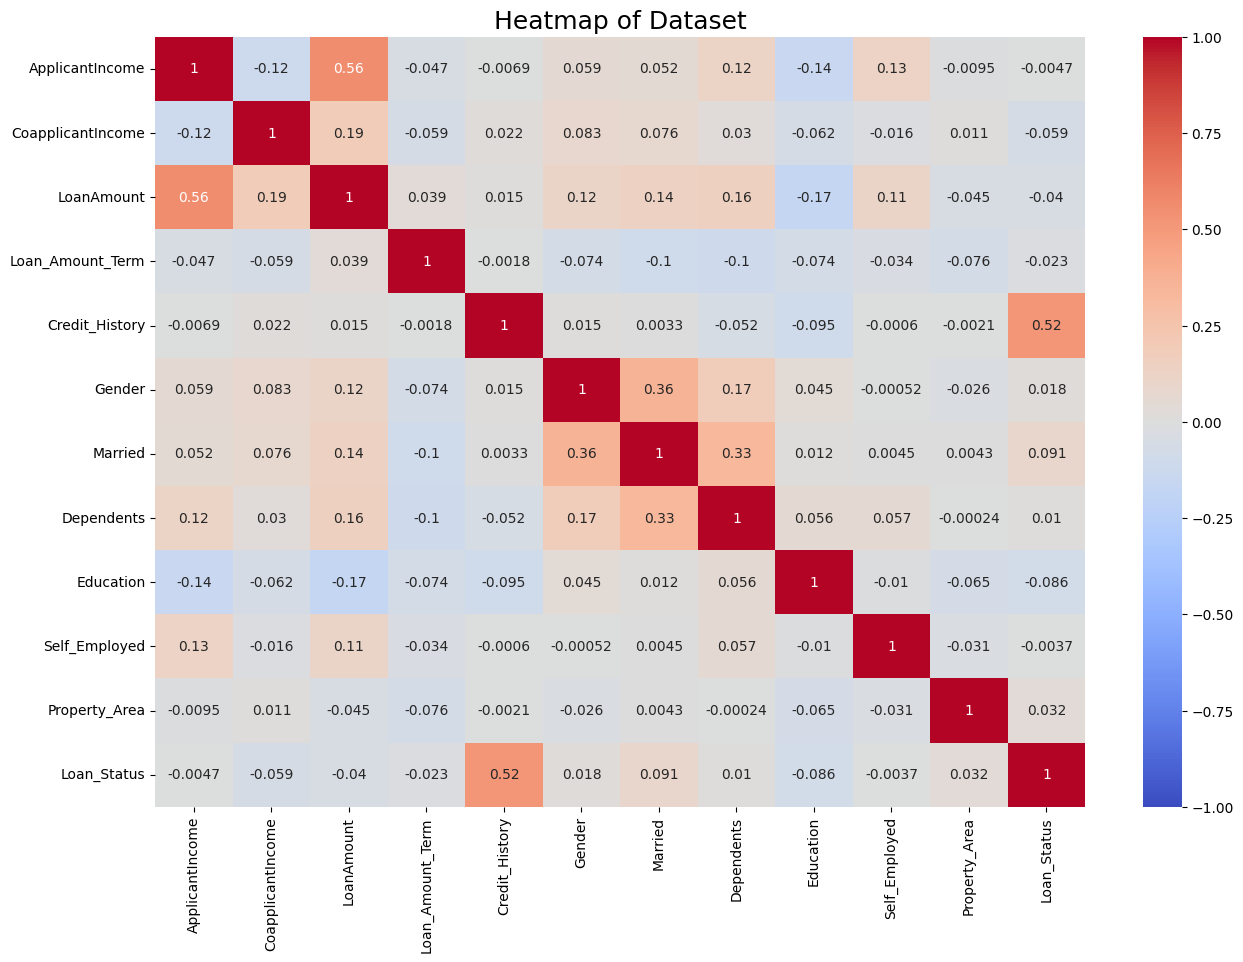

In [545]:
# Plot correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heatmap of Dataset',fontsize=18)
plt.show();


Credit_History  has the highest correlation with Loan_Status (a positive correlation of 0.52). Therefore our target value is highly dependent on this column.

### 4- Building and evaluating of the model

Model we will use: 
- Decision Tree
- Random Forest
- KNN
- Logistic regression



##### Assign predictor variables and target variable


In [546]:
# Target variable
Y = data['Loan_Status']

In [547]:
# Predictor variables

X = data.drop('Loan_Status', axis = 1)

##### Divide the dataset into train and test data

In [548]:
# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size = 0.2, random_state = 42)

##### Get the train and test size

In [550]:
# Print the train and test size
print('X_train size:', X_train.shape)
print('X_test size:',X_test.shape)
print('Y_train size:',Y_train.shape)
print('Y_test size:',Y_test.shape)


X_train size: (491, 11)
X_test size: (123, 11)
Y_train size: (491,)
Y_test size: (123,)


##### - Decision Tree

In [551]:
# Instanciate the model
DT = DecisionTreeClassifier(random_state = 42)

# Fit the model
DT.fit(X_train, Y_train)
Y_predict = DT.predict(X_test)

# Create a classification report
print(classification_report(Y_test, Y_predict))

# Accuracy score
DT_SC = accuracy_score(Y_test, Y_predict)
print(f"The accuracy level: {round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.49      0.53      0.51        38
           1       0.78      0.75      0.77        85

    accuracy                           0.68       123
   macro avg       0.63      0.64      0.64       123
weighted avg       0.69      0.68      0.69       123

The accuracy level: 68.29% Accurate


##### - Random Forest

In [552]:
# Instanciate the model
RF = RandomForestClassifier(random_state = 42)

# Fit the model
RF.fit(X_train, Y_train)
Y_predict = RF.predict(X_test)

# Create a classification report
print(classification_report(Y_test, Y_predict))

# Accuracy score
RF_SC = accuracy_score(Y_test, Y_predict)
print(f"The accuracy level: {round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123

The accuracy level: 83.74% Accurate


##### - KNN

In [553]:
# Instanciate the model
KN = KNeighborsClassifier()

# Fit the model
KN.fit(X_train, Y_train)
Y_predict = KN.predict(X_test)

# Create a classification report
print(classification_report(Y_test, Y_predict))

# Accuracy score
KN_SC = accuracy_score(Y_test, Y_predict)
print(f"The accuracy level: {round(KN_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.41      0.29      0.34        38
           1       0.72      0.81      0.76        85

    accuracy                           0.65       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.62      0.65      0.63       123

The accuracy level: 65.04% Accurate


##### - Logistic Regression

###### * Check the assumptions for logistic regression

The following are the assumptions for logistic regression:
- Independent observations (This refers to how the data was collected.)
- No outliers
- No severe multicollinearity 
- Linear relationship between X and the logit of y

For: 
- The first assumption, we can assume that observations are independent for this project.
- About the  second assumption the data doens't have outliers.
- The is no multicollinearity.
- The last assumption: In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where p is the probability of response: logit(p) = ln(p/1-p).


###### * Build the model

In [554]:
# Instanciate the model
LR = LogisticRegression(random_state = 42, max_iter = 400, penalty = 'l1', solver='liblinear')

# Fit the model
LR.fit(X_train, Y_train)
Y_predict = LR.predict(X_test)

# Create a classification report
print(classification_report(Y_test, Y_predict))

# Accuracy score
LR_SC = accuracy_score(Y_test, Y_predict)
print(f"The accuracy level: {round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123

The accuracy level: 85.37% Accurate


##### Now create a table for all score

In [555]:
score = [DT_SC,RF_SC,KN_SC,LR_SC]
Model = pd.DataFrame({
    'ML Models': ["Decision Tree","Random Forest","KNN", "Logistic Regression"],
    'Score': score})
Model.sort_values(by='Score', ascending=False)

,ML Models,Score
3,Logistic Regression,0.853659
1,Random Forest,0.837398
0,Decision Tree,0.682927
2,KNN,0.650407


##### Plot a confusion matrix of the champion model's predictions.

In [556]:
# Get the confusion matrix
cm = confusion_matrix(Y_test, LR.predict(X_test))

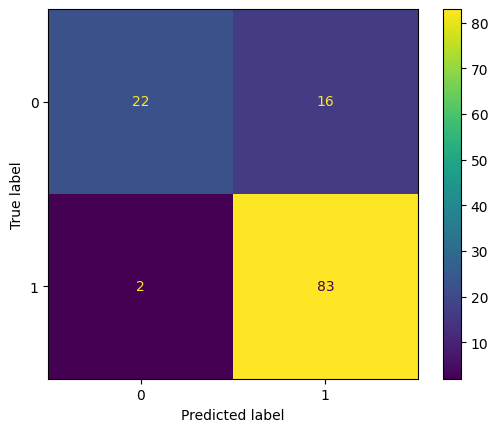

In [557]:
# Display the confusion matrix from the above cell

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'],
                              )
disp.plot();

##### The high True positives = 83, and True Negatives = 22, indicate good overall performance.


##### Calculate precision and recall manually

In [558]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.8383838383838383

In [559]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.9764705882352941

Awesome! Everything looks good!

##### Get the coefficients of each variable. 
The coefficients are in order of how the variables are listed in the dataset. 
The coefficients represent the change in the log odds of the target variable for every one unit increase in X.

In [560]:
pd.Series(LR.coef_[0], index=X.columns)

ApplicantIncome     -0.000004
CoapplicantIncome   -0.000059
LoanAmount          -0.000896
Loan_Amount_Term    -0.001191
Credit_History       2.873522
Gender              -0.175601
Married              0.433112
Dependents           0.095153
Education           -0.335396
Self_Employed       -0.104460
Property_Area        0.029077
dtype: float64

##### Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features

In [561]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, LR.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('Credit_History', 2.8735218066349804),
 ('Married', 0.43311161955927935),
 ('Dependents', 0.09515339805522645),
 ('Property_Area', 0.029076717118433026),
 ('ApplicantIncome', -3.900931866275405e-06),
 ('CoapplicantIncome', -5.9352357789864654e-05),
 ('LoanAmount', -0.0008962465428319331),
 ('Loan_Amount_Term', -0.001191247773453141),
 ('Self_Employed', -0.10446020877380914),
 ('Gender', -0.17560095992464983),
 ('Education', -0.33539641354534316)]

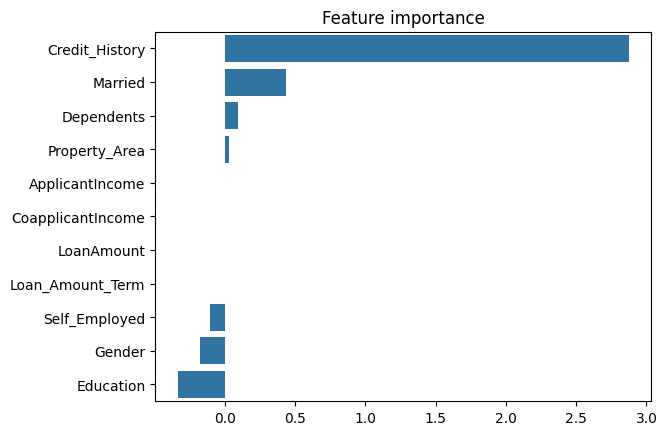

In [562]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### 5- Conclusion

- Credit_History is a very important variable because of its high correlation with Loan_Status.
- The Logistic Regression and Random forest performed well.
- The Logistic Regression model has a Good precision : 84 % and very high recall = 98 %, which means that it will not make a lot of false negative and false positive predictions.
- What are the ethical implications of the model? What are the consequences of your model making errors?
What is the likely effect of the model when it predicts a false negative (i.e., when the model predicts not to authorize the loan to a customer, but we will in fact)?
In this case, the company will have a shortfall in terms of turnover

What is the likely effect of the model when it predicts a false positive (i.e., when the model predicts to authorize the loan to a customer, but we won't actually do that)?
The company can take proactive steps to get customers to pay for their loans.
